In [36]:
# Importing imp libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [37]:
#importing the data
df = pd.read_csv("Lungs _cancer.csv",  sep=',')

print(f'No of rows in the data {df.shape}')
df.head()

No of rows in the data (3000, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [38]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [39]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [40]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


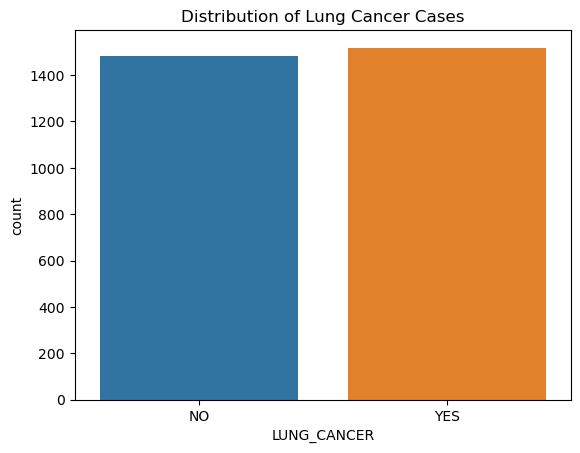

In [41]:
# Plot the distribution of the target variable
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer Cases')
plt.show()

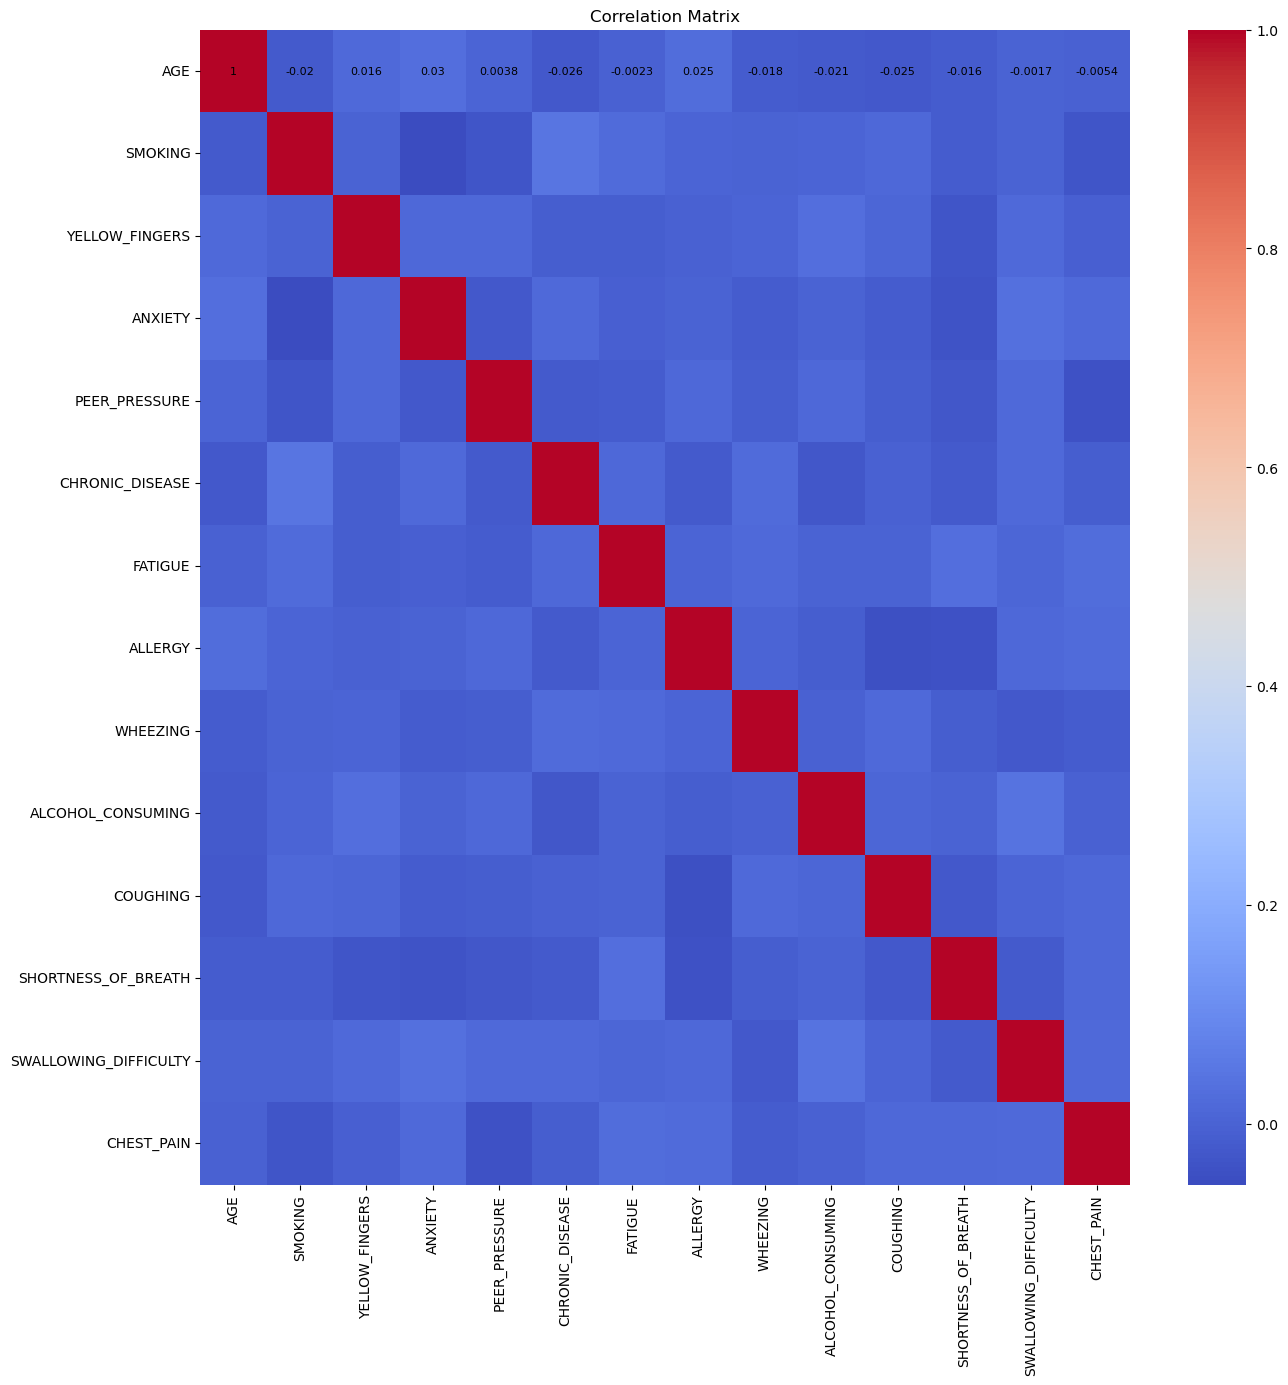

In [42]:

# Assuming df is your dataframe
numerical_columns = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8, "color": "black"})
plt.title('Correlation Matrix')
plt.show()


In [43]:
correlation_value = correlation_matrix.loc['COUGHING', 'SHORTNESS_OF_BREATH']
print(correlation_value)

-0.02350011565813502


In [44]:
## Preprocessing
df['LUNG_CANCER_N'] = np.where(df['LUNG_CANCER'] == 'NO', 0, 1)
df['GENDER_N'] = np.where(df['GENDER'] == 'M', 1, 0).astype(np.int64)


In [45]:
numerical_columns.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
AGE,1.000000,-0.020289,0.016101,0.030051,0.003850,-0.025655,-0.002322,0.024915,-0.018212,-0.020704,-0.024909,-0.015873,-0.001688,-0.005426
SMOKING,-0.020289,1.000000,-0.001497,-0.055562,-0.032041,0.045697,0.019635,0.004908,0.000571,0.003022,0.011722,-0.015772,-0.001706,-0.031387
YELLOW_FINGERS,0.016101,-0.001497,1.000000,0.012342,0.011394,-0.013216,-0.010761,-0.005709,0.004151,0.027167,0.010076,-0.034018,0.018590,-0.006595
ANXIETY,0.030051,-0.055562,0.012342,1.000000,-0.024692,0.016903,-0.006250,-0.001174,-0.016065,-0.001542,-0.017082,-0.034967,0.033762,0.015969
PEER_PRESSURE,0.003850,-0.032041,0.011394,-0.024692,1.000000,-0.021299,-0.017378,0.011361,-0.011344,0.013967,-0.012627,-0.028723,0.015962,-0.039339
CHRONIC_DISEASE,-0.025655,0.045697,-0.013216,0.016903,-0.021299,1.000000,0.011071,-0.019597,0.022108,-0.028341,-0.003747,-0.020212,0.016406,-0.013951
FATIGUE,-0.002322,0.019635,-0.010761,-0.006250,-0.017378,0.011071,1.000000,0.004944,0.015227,0.000309,-0.001560,0.029519,0.010244,0.024617
ALLERGY,0.024915,0.004908,-0.005709,-0.001174,0.011361,-0.019597,0.004944,1.000000,0.005405,-0.011772,-0.045632,-0.042363,0.012946,0.018704
WHEEZING,-0.018212,0.000571,0.004151,-0.016065,-0.011344,0.022108,0.015227,0.005405,1.000000,-0.004093,0.016118,-0.012132,-0.023449,-0.016015
ALCOHOL_CONSUMING,-0.020704,0.003022,0.027167,-0.001542,0.013967,-0.028341,0.000309,-0.011772,-0.004093,1.000000,0.008373,0.000918,0.042991,-0.004047


#### We can't see high correlation of LUNG_CANCER with any variable 

C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\1870698197.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='AGE', shade=True, hue='LUNG_CANCER', palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


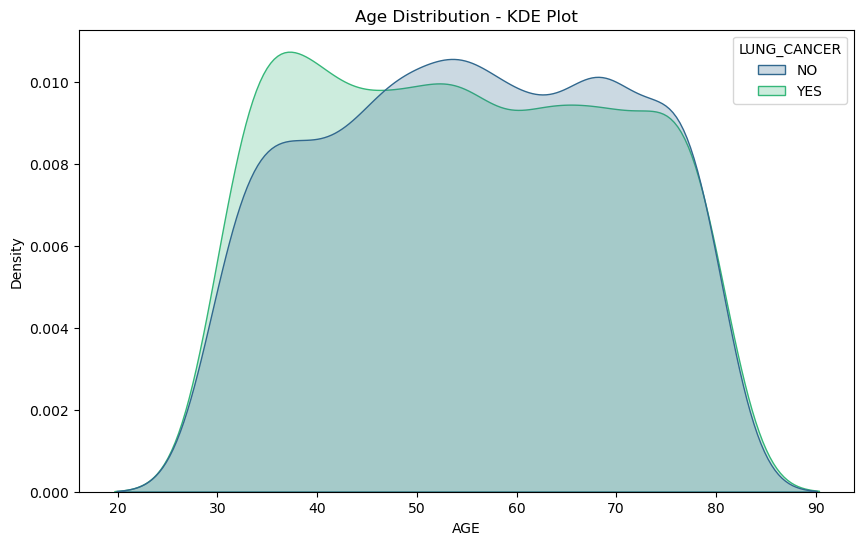

In [46]:
# What is the distribution of age among heart Lung cancer patients in the dataset?

# Plotting the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='AGE', shade=True, hue='LUNG_CANCER', palette='viridis')


# Adding title and labels
plt.title('Age Distribution - KDE Plot')
plt.xlabel('AGE')
plt.ylabel('Density')

# Display the plot
plt.show()



#### With age disbn we can see cancer is more in People with age between 30-40. But we need to see the cancer rate to get clear picture

C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\2299530025.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_by_age_bin = df.groupby('age_bin')['LUNG_CANCER_N'].mean()


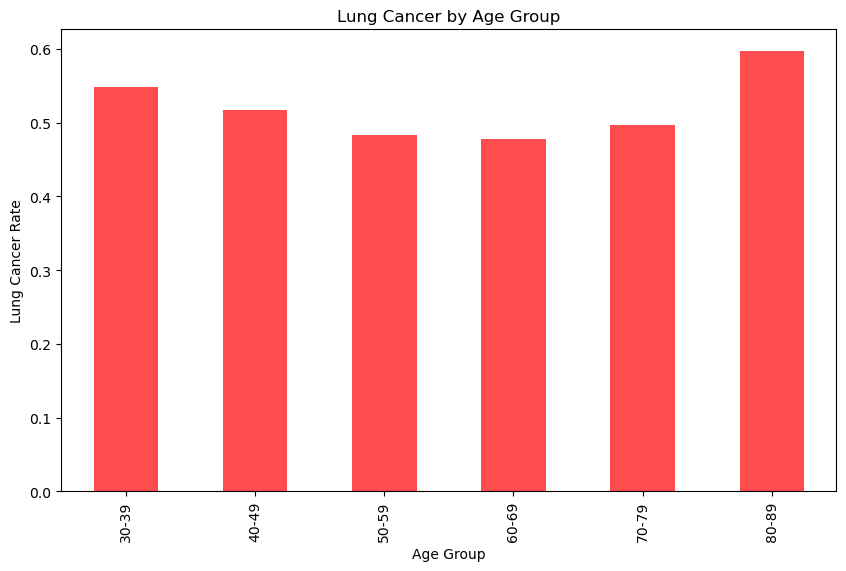

age_bin
30-39    0.548387
40-49    0.516696
50-59    0.482645
60-69    0.477966
70-79    0.496610
80-89    0.596491
Name: LUNG_CANCER_N, dtype: float64

In [47]:
#   How does the cancer rate vary with age?
# Define age bins
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['30-39','40-49', '50-59', '60-69', '70-79', '80-89']

# Add age bins to DataFrame
df['age_bin'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

death_rate_by_age_bin = df.groupby('age_bin')['LUNG_CANCER_N'].mean()

plt.figure(figsize=(10, 6))
death_rate_by_age_bin.plot(kind='bar', color='red', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Lung Cancer Rate')

# Display the plot
plt.show()

death_rate_by_age_bin

#### With cancer rate we can see People with age 80+ has more cancer rate than other age bins

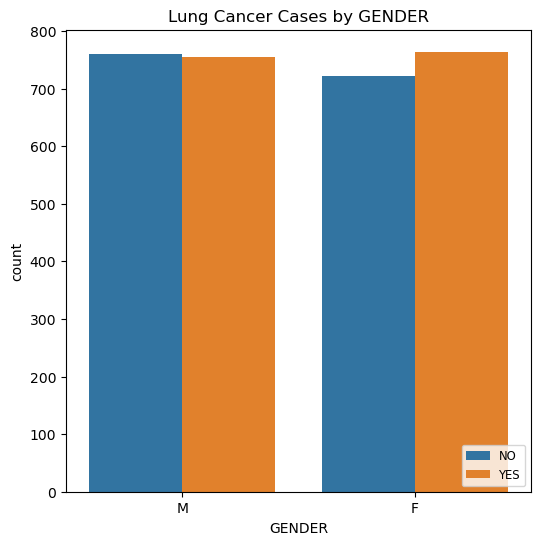

In [48]:
# Working with Char variables

char_columns = df.select_dtypes(include=['object']).drop(columns = ['LUNG_CANCER'])

for var in char_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=var, hue='LUNG_CANCER', data=df)
    plt.title(f'Lung Cancer Cases by {var}')
    plt.legend(loc='lower right', fontsize='small')
    plt.show()


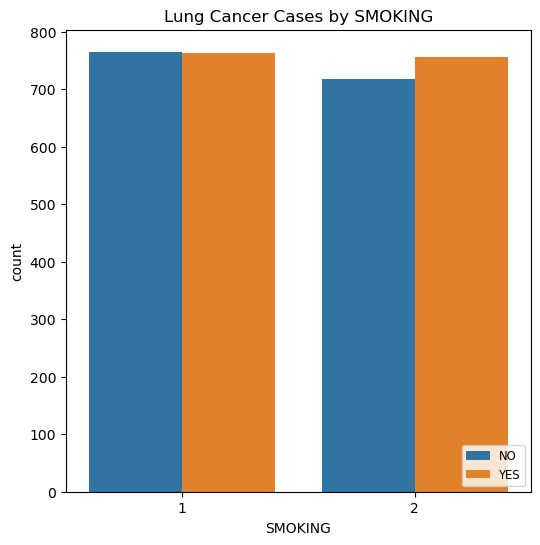

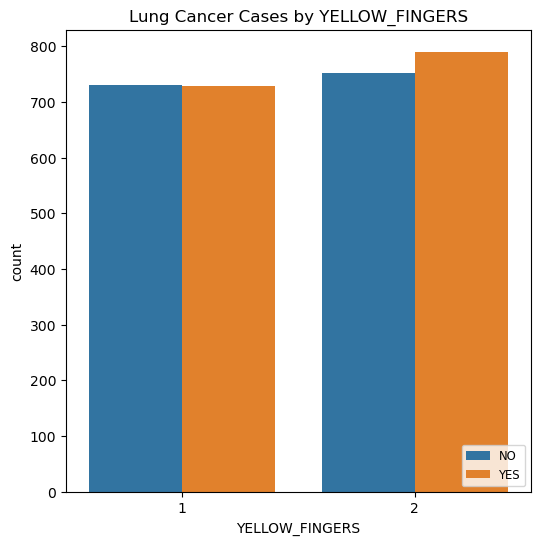

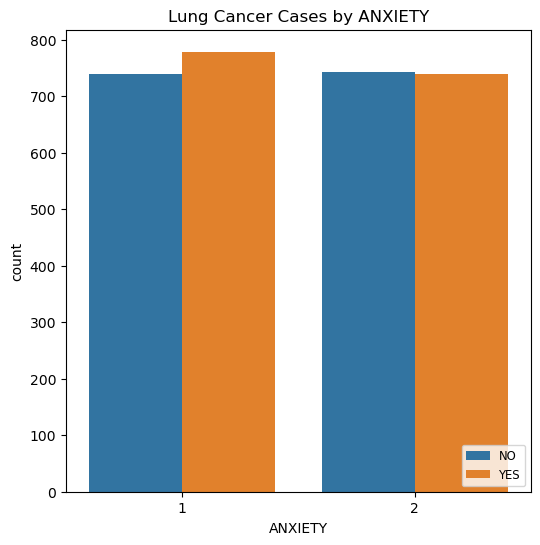

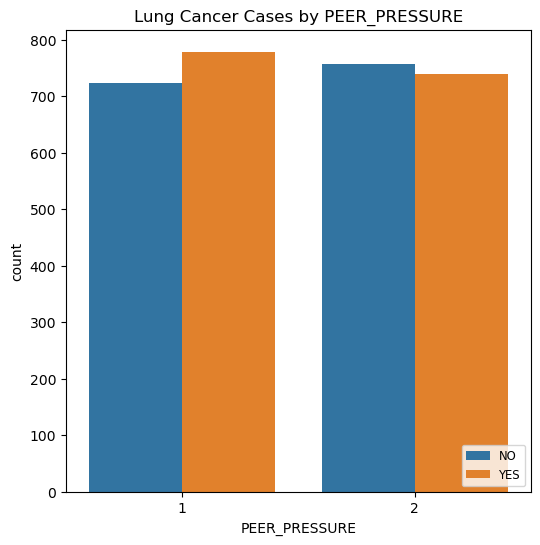

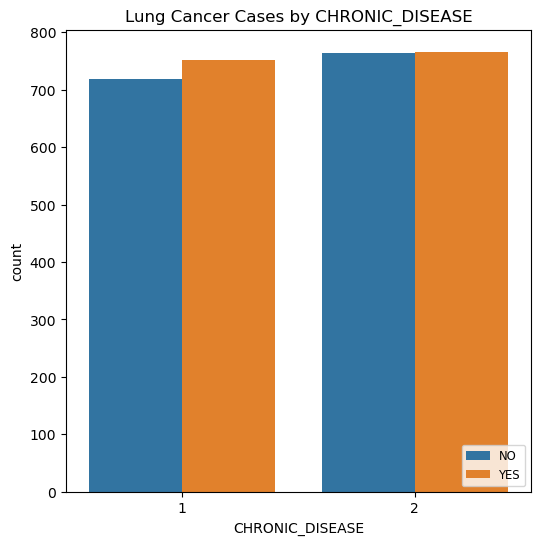

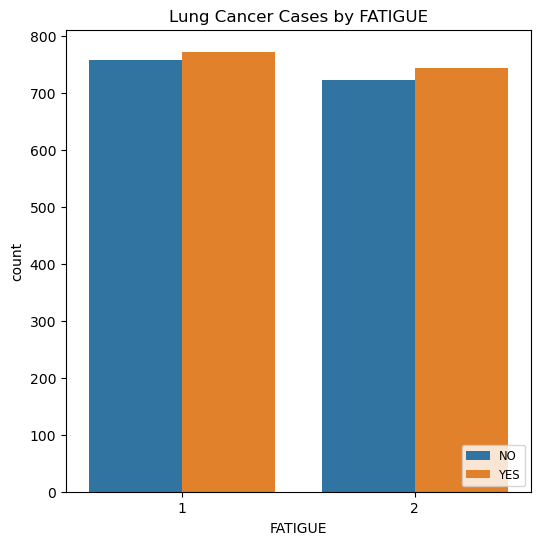

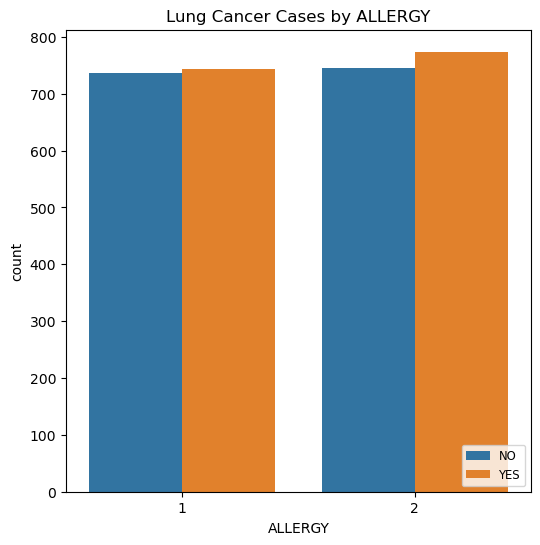

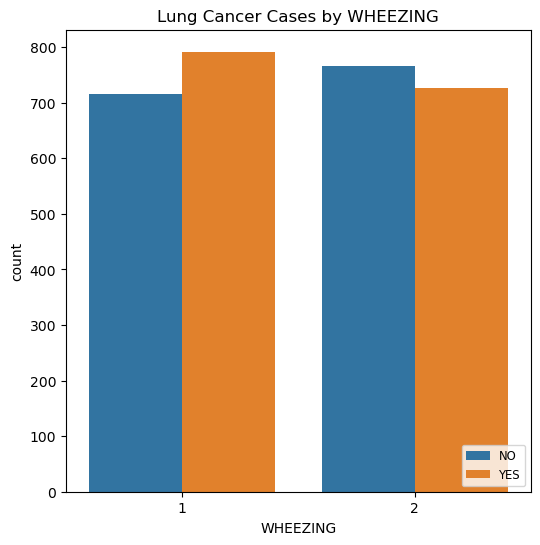

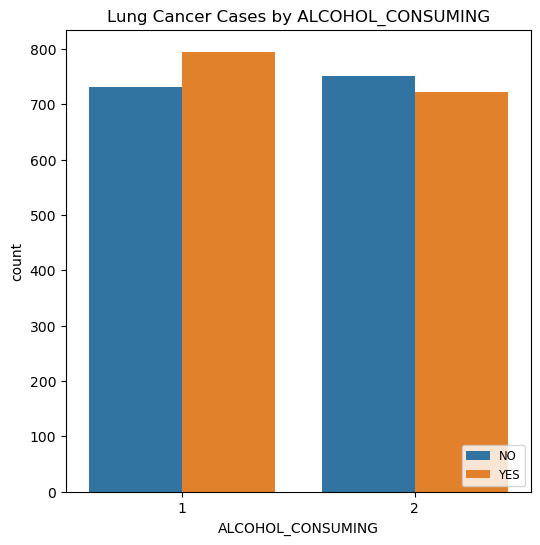

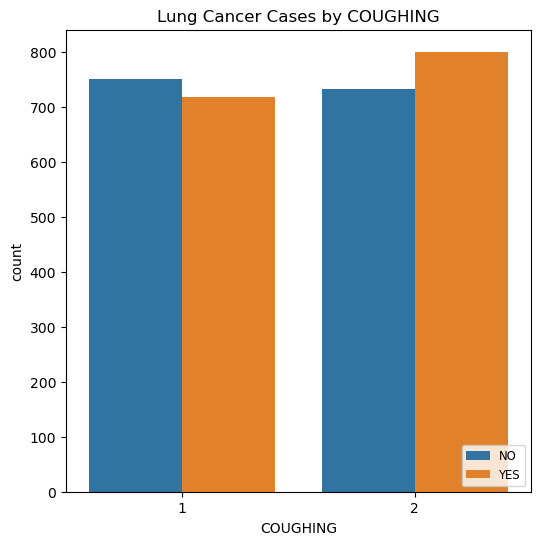

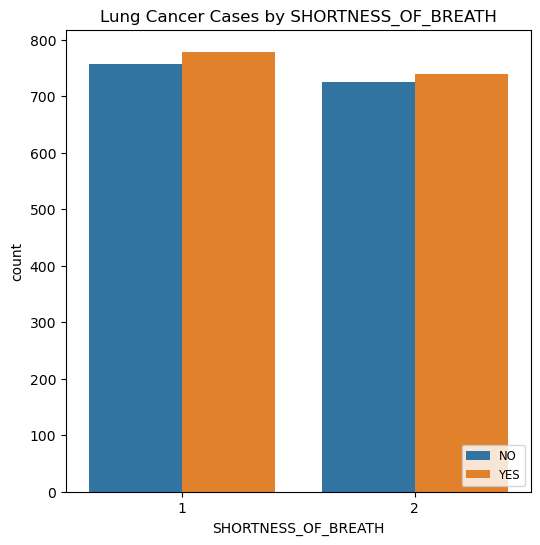

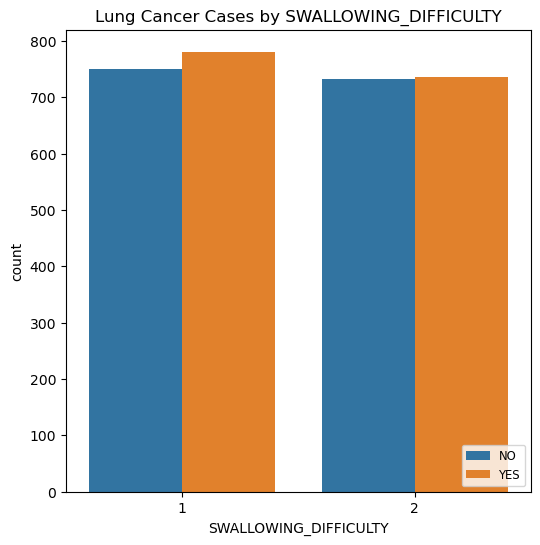

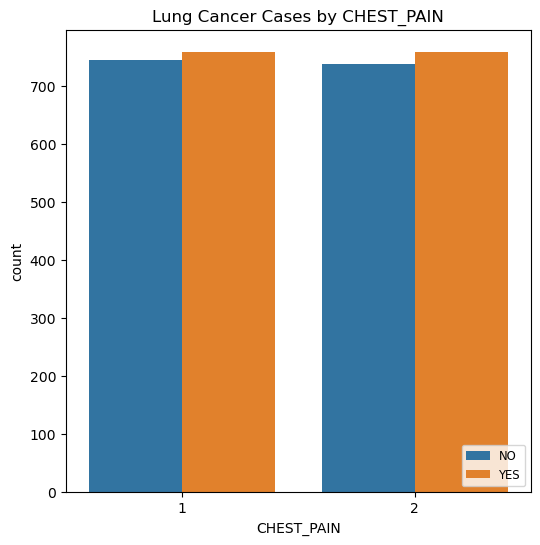

In [49]:
# Working with Numerical variables

char_columns = df.select_dtypes(include=['number']).drop(columns = ['LUNG_CANCER_N','AGE','GENDER_N'])

for var in char_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=var, hue='LUNG_CANCER', data=df)
    plt.title(f'Lung Cancer Cases by {var}')
    plt.legend(loc='lower right', fontsize='small')
    plt.show()


We can univariate analysis not helping much

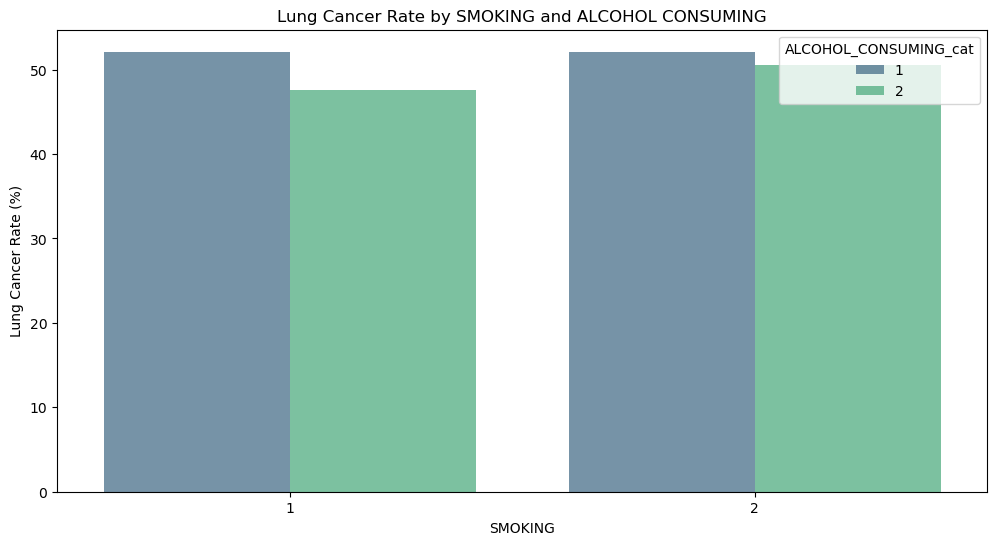

,SMOKING,ALCOHOL_CONSUMING_cat,LUNG_CANCER_N
0,1,1,52.118100
1,1,2,47.593583
2,2,1,52.074967
3,2,2,50.550964


In [50]:
#   How does the cancer rate vary with SMOKING and ALCOHOL_CONSUMING?

df['ALCOHOL_CONSUMING_cat'] = df['ALCOHOL_CONSUMING'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SMOKING', 'ALCOHOL_CONSUMING_cat'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='SMOKING', y='LUNG_CANCER_N', hue='ALCOHOL_CONSUMING_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by SMOKING and ALCOHOL CONSUMING')
plt.xlabel('SMOKING')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()

cancer_rate_by_smoking_and_alcohol_consuming


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\3641562397.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SMOKING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

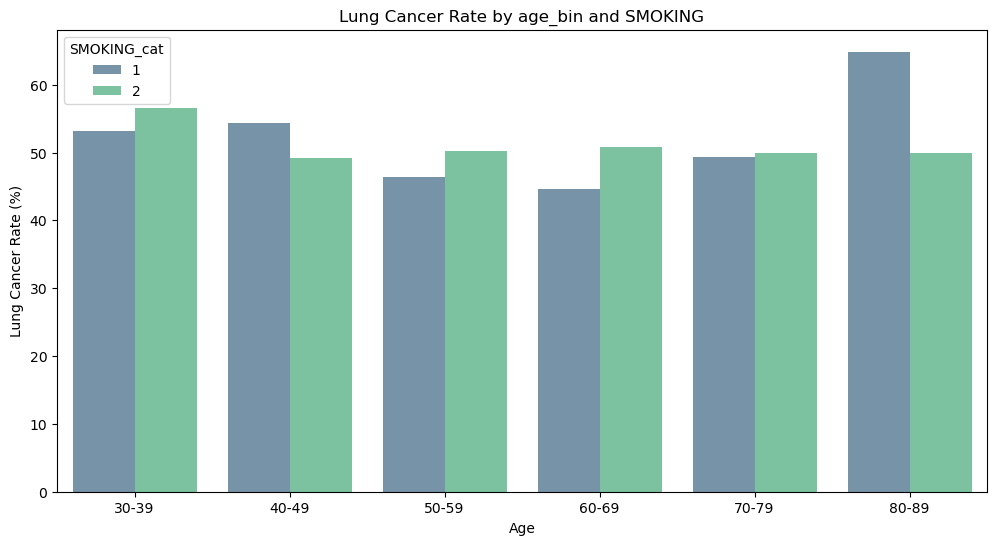

In [59]:

df['SMOKING_cat'] = df['SMOKING'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SMOKING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='SMOKING_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and SMOKING')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()




We can see Smoking has major role in old age people  

C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\1962730281.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['COUGHING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

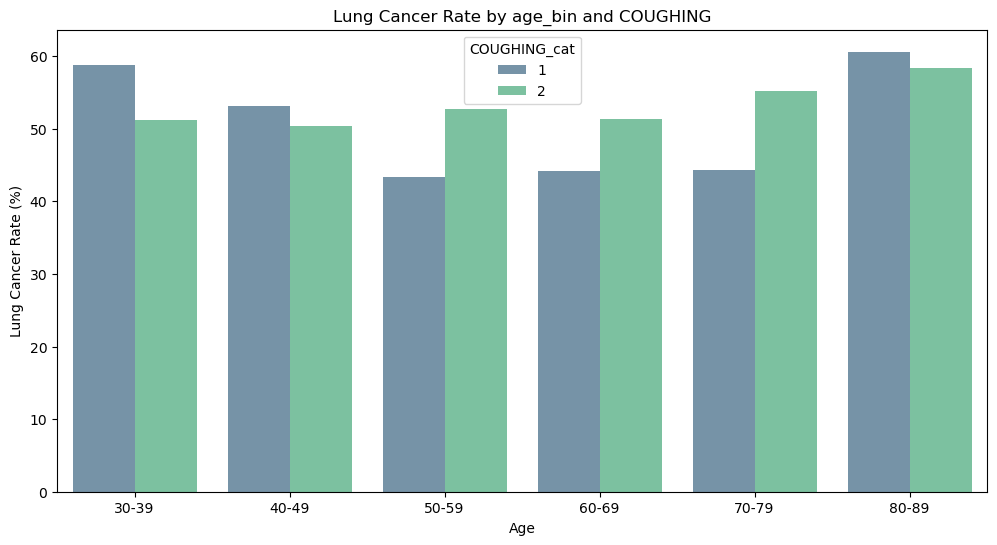

In [60]:
#   How does the cancer rate vary with SMOKING and ALCOHOL_CONSUMING?

df['COUGHING_cat'] = df['COUGHING'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['COUGHING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='COUGHING_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and COUGHING')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\2427553725.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['YELLOW_FINGERS_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

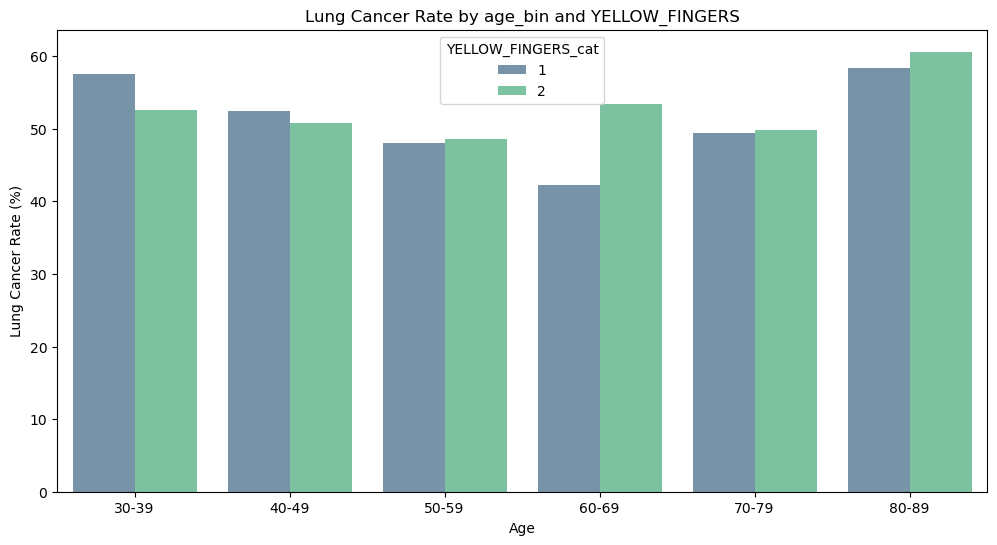

In [61]:

df['YELLOW_FINGERS_cat'] = df['YELLOW_FINGERS'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['YELLOW_FINGERS_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='YELLOW_FINGERS_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and YELLOW_FINGERS')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\704757736.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['CHEST_PAIN_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

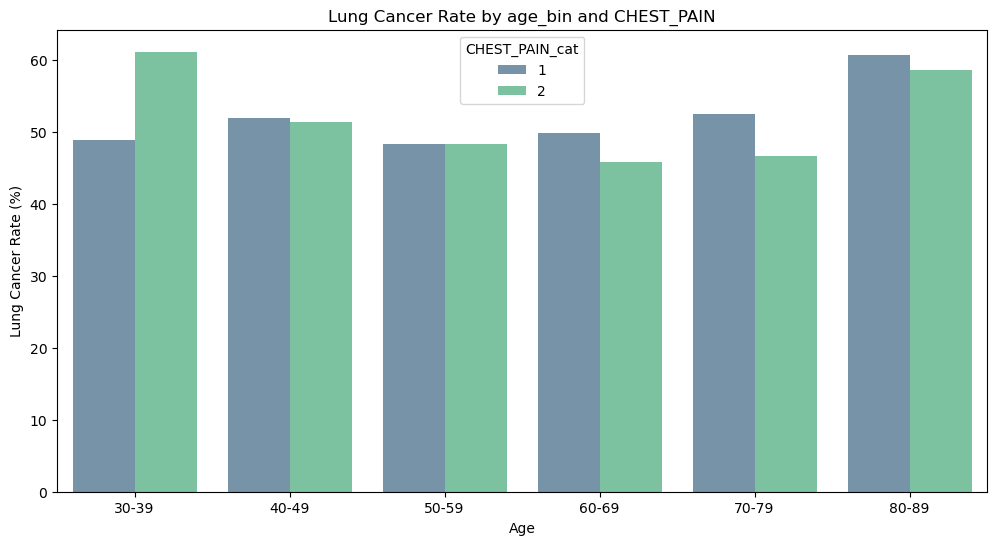

C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\3480843390.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SWALLOWING_DIFFICULTY_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

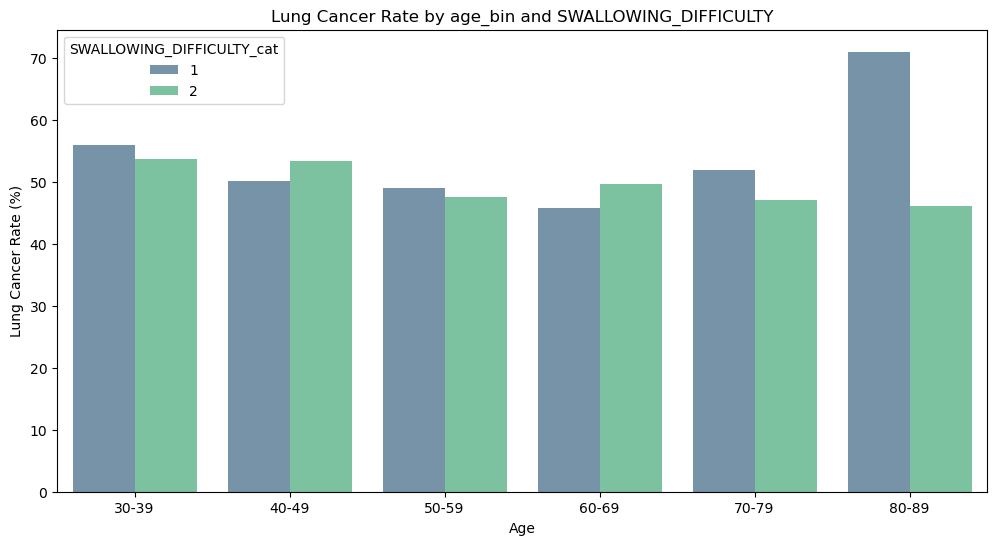

In [65]:

df['SWALLOWING_DIFFICULTY_cat'] = df['SWALLOWING_DIFFICULTY'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SWALLOWING_DIFFICULTY_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='SWALLOWING_DIFFICULTY_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and SWALLOWING_DIFFICULTY')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\322693062.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['WHEEZING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

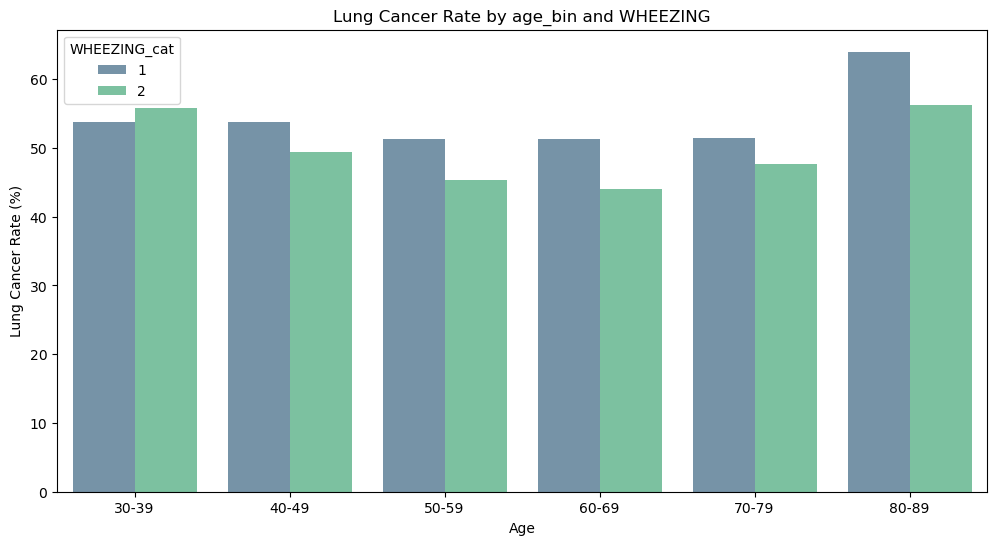

In [66]:

df['WHEEZING_cat'] = df['WHEEZING'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['WHEEZING_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='WHEEZING_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and WHEEZING')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\68315625.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['ANXIETY_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

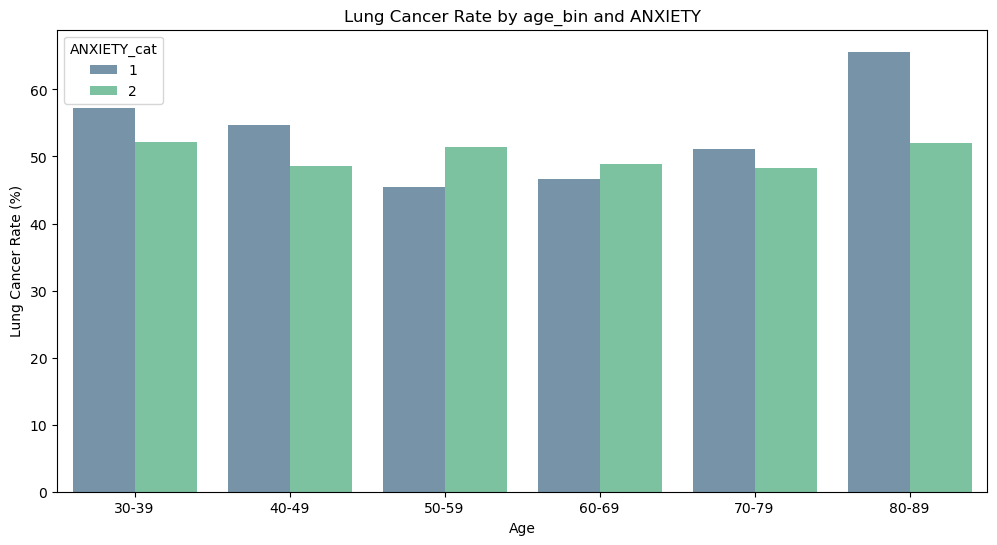

In [69]:

df['ANXIETY_cat'] = df['ANXIETY'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['ANXIETY_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='ANXIETY_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and ANXIETY')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\3305819723.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['PEER_PRESSURE_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

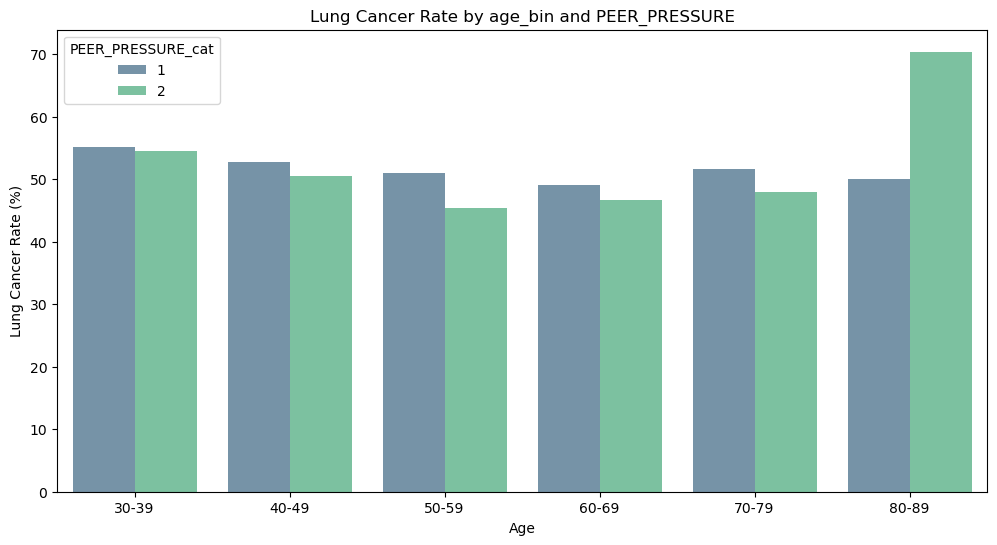

In [70]:

df['PEER_PRESSURE_cat'] = df['PEER_PRESSURE'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['PEER_PRESSURE_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='PEER_PRESSURE_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and PEER_PRESSURE')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\3433820930.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SHORTNESS_OF_BREATH_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

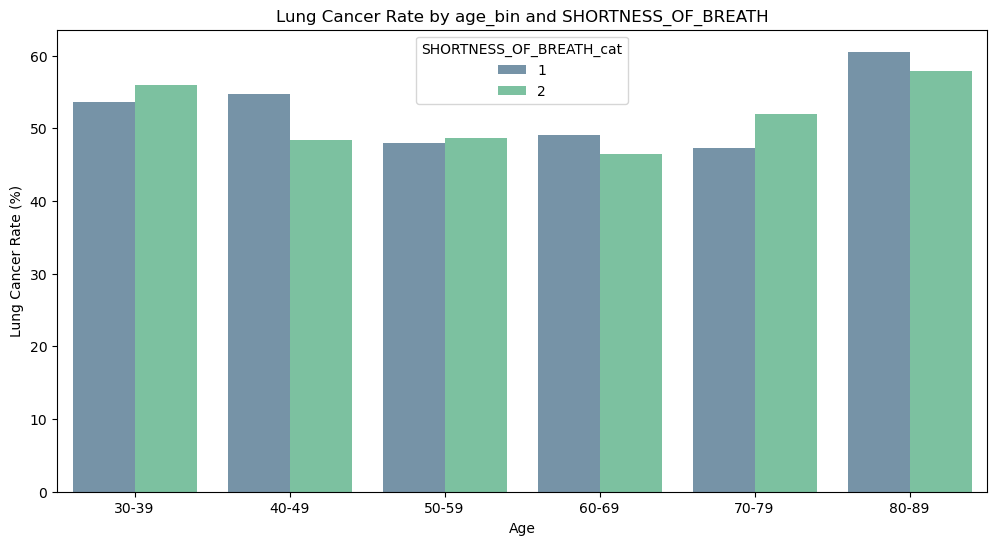

In [71]:

df['SHORTNESS_OF_BREATH_cat'] = df['SHORTNESS_OF_BREATH'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['SHORTNESS_OF_BREATH_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='SHORTNESS_OF_BREATH_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and SHORTNESS_OF_BREATH')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


C:\Users\sredekar\AppData\Local\Temp\ipykernel_10956\2005086315.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['FATIGUE_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

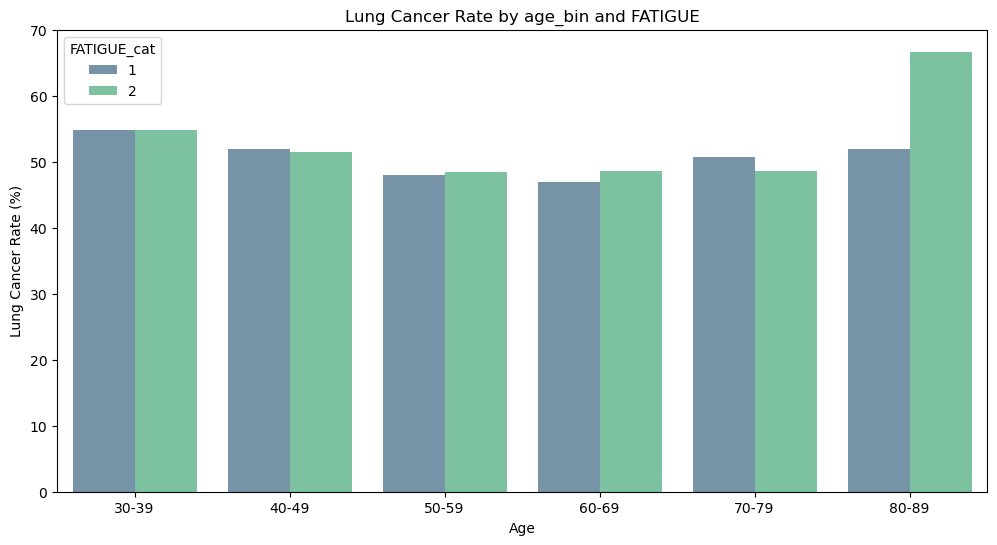

In [73]:

df['FATIGUE_cat'] = df['FATIGUE'].astype('str')

cancer_rate_by_smoking_and_alcohol_consuming = df.groupby(['FATIGUE_cat', 'age_bin'])['LUNG_CANCER_N'].mean() * 100

cancer_rate_by_smoking_and_alcohol_consuming = cancer_rate_by_smoking_and_alcohol_consuming.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=cancer_rate_by_smoking_and_alcohol_consuming, x='age_bin', y='LUNG_CANCER_N', hue='FATIGUE_cat', palette='viridis', alpha=0.7)

# Adding title and labels
plt.title('Lung Cancer Rate by age_bin and FATIGUE')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Rate (%)')
plt.show()


## Final Insights

1. People with older age >60 affected by lung cancer have more symptoms of chest pain, ANXIETY, SHORTNESS_OF_BREATH & WHEEZING compared to young age people
2. People with young age 30-40 affected by lung cancer have more symptoms of coughfing issues, FATIGUE, Peer pressure & Yellow fingers compared to old age people
